# How to add an inset map with Cartopy in Python

```{post} 06 Jan 2022
:tags: open science, python
:author: Adam R. Jensen```

You know that small map that shows a zoomed-in view of a part of a bigger map? Well, it's called an inset map, and according to [Wikipedia](https://en.wikipedia.org/wiki/Map_layout#Inset_map):
> Inset maps are smaller maps that are included on the same page as the main map. They can show additional information related to the main map.

There are four common types of inset maps:
* **Locator map:** used to show the position of the map in a larger context
* **Detail inset:** (significantly larger scale (aka. zoomed-in) to show more details in part of the map)
* **Thematic inset:** depicts the same area as the main map, but in a different theme, for example showing the solar resource
* **Extension inset:** shows a non-contiguous area related to the map, typically of an island or territory

In this tutorial, I'll show you have you can add a detailed inset, which can be a cool and informative addition to your map.

Import necessary libraries:

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import cartopy
import cartopy.crs as ccrs

In order to have some example data to plot, we'll import coordinates of solar radiation monitoring stations from [SolarStations.org](https://SolarStations.org):

In [19]:
solarstations_url = 'https://raw.githubusercontent.com/AssessingSolar/solarstations/main/solarstations.csv'
stations = pd.read_csv(solarstations_url, encoding='latin1').fillna('')
stations.iloc[:3, :7]  # Show part of the DataFrame

,Station full name,Abbreviation,State,Country,Latitude,Longitude,Elevation
0,Abashiri,ABS,,Japan,44.0178,144.2797,38.0
1,Alert,ALE,Lincoln Sea,Canada,82.4900,-62.4200,127.0
2,Alice Springs,ASP,Northern Territory,Australia,-23.7980,133.8880,547.0


<br>

Plot the main map and add the inset map using [`mpl_toolkits.axes_grid1.inset_locator.inset_axes`](https://matplotlib.org/3.1.1/api/_as_gen/mpl_toolkits.axes_grid1.inset_locator.inset_axes.html):

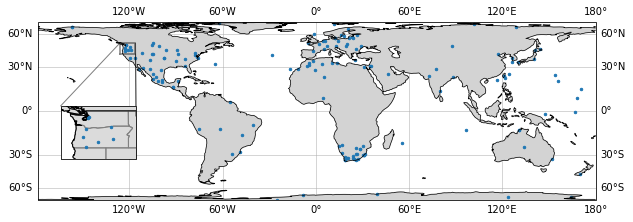

In [18]:
crs = ccrs.LambertCylindrical()  # Map projection

fig, ax = plt.subplots(figsize=(10,5), subplot_kw={'projection': crs})

# Set limits of main map [min_lon, max_lon, min_lat, max_lat]
ax.set_extent([-179, 180, -90, 90])

# Add land borders, coastline, and gridlines to main map
ax.add_feature(cartopy.feature.LAND, facecolor='lightgrey', zorder=0)
ax.coastlines(edgecolor='black', lw=0.7, zorder=3)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.65, lw=0.1, zorder=-1)


# Add inset map
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axins = inset_axes(ax, width="60%", height="60%", loc='lower left',
                   bbox_to_anchor=(-0.05, 0.2, 0.5, 0.5),
                   bbox_transform=ax.transAxes,
                   axes_class=cartopy.mpl.geoaxes.GeoAxes,
                   axes_kwargs=dict(map_projection=crs))

# Add land, state borders, coastline, and country borders to inset map
axins.add_feature(cartopy.feature.LAND.with_scale('50m'), facecolor='lightgrey', alpha=0.8, zorder=0)
axins.add_feature(cartopy.feature.STATES.with_scale('50m'), edgecolor='gray', facecolor='none')
axins.add_feature(cartopy.feature.COASTLINE.with_scale('50m'))
axins.add_feature(cartopy.feature.BORDERS.with_scale('50m'))

# Set the lat/lon limits of the inset map [x0, x1, y0, y1]
inset_extent = [-126, -116, 40, 50]
axins.set_extent(inset_extent)

# Add box around location of inset map on the main map
x = [inset_extent[0], inset_extent[1], inset_extent[1], inset_extent[0], inset_extent[0]]
y = [inset_extent[2], inset_extent[2], inset_extent[3], inset_extent[3], inset_extent[2]]
ax.plot(x, y, color='k', alpha=0.5, transform=ccrs.PlateCarree())


# Draw lines between inset map and box on main map
rect, connectors = ax.indicate_inset_zoom(axins, edgecolor="black", alpha=0.5, transform=ax.transAxes)
# By default only two of the connecting lines (connectors) are shown
# it is possible to choose which of the lines to show by setting the visibility
# connectors are counted clockwise from the lower-left corner
connectors[0].set_visible(False)
connectors[1].set_visible(True)
connectors[3].set_visible(True)
connectors[2].set_visible(True)

# Add points of solar stations to both maps
# it is important to specify `transform=ccrs.PlateCarree()` to transform the points from
# regular latitude/longitude (PlateCarree) to the specific map projection
stations.plot.scatter(ax=ax, x='Longitude', y='Latitude', s=6, transform=ccrs.PlateCarree())
stations.plot.scatter(ax=axins, x='Longitude', y='Latitude', s=6, transform=ccrs.PlateCarree())

plt.show()

In the example above, an inset map was demonstrated, however, much of the code can be reused to create any of the other types of inset maps.